In [2]:
import pandas as pd
import numpy as np 
import re 
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [62]:
def run_analyzer(foldername): 
 
    runs = pd.DataFrame(columns = ["Generation", "NN", "Fitness","Score","Run"]) 
 
    for run in os.listdir(f"/Users/cetiners/Desktop/NOVA IMS/CIFO Project/Projects/BOTS_snake/runs/{foldername}"):     
        if (".csv" in run): 
            run_data = 0 
            run_data = pd.read_csv(f"/Users/cetiners/Desktop/NOVA IMS/CIFO Project/Projects/BOTS_snake/runs/{foldername}/{run}") 
            run_data["Run"] = int(re.findall(r'\d+',run.split("_")[-1])[0]) 
            if len(run_data.columns) < 4: 
                run_data = run_data.iloc[:,0].str.split(",",expand=True)[[0,2,3,4,6]] 
                run_data[[2,3,4]] = 0 
            run_data.columns = runs.columns 
            runs = runs.append(run_data) 
 
    runs = runs.drop("NN",axis=1).astype(int) 
 
    max_in_run = runs.sort_values("Fitness",ascending=False).head(15) 
     
    print(f"Maximum values achieved in the configuration:\n\n {max_in_run}\n") 
    print("---------------------------------------------------------------\n") 
    sns.set_style("whitegrid") 
 
 
    runs_gb = runs.groupby(["Run","Generation"]).max().reset_index() 
 
    fig, ax = plt.subplots(figsize=(12,7)) 
 
    sns.lineplot(data=runs_gb, x="Generation", y="Score", hue="Run", palette="rocket").set_title(f"Max snake score over generations") 
 
    fig, ax = plt.subplots(figsize=(12,7)) 
 
    sns.lineplot(data=runs_gb, x="Generation", y="Fitness", hue="Run", palette="rocket").set_title(f"Max snake fitness over generations") 
  
    df_fitness = pd.DataFrame(columns=runs.columns)       

    for run_num in runs["Run"].unique(): 
        r1 = runs[runs["Run"] == run_num] 
        r1 = r1.groupby("Generation").max().reset_index() 
        df_fitness = df_fitness.append(r1) 
     
    df_fitness = df_fitness.astype("int") 
 
    df_fitness = df_fitness.groupby("Generation").mean()["Score"]
 
    return df_fitness, max_in_run["Score"].iloc[0]                                                                                                               

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
5998         100   253184     50    8
5938          99   253184     50    8
5853          98   253184     50    8
5865          98   238122     47    8
5900          99   223034     44    8
5919          99   218130     43    8
5996         100   218014     43    8
5903          99   213084     42    8
5980         100   202524     40    8
5988         100   197820     39    8
5871          98   193194     38    8
5850          98   193054     38    8
5968         100   192096     38    8
5835          98   182358     36    8
5972         100   177486     35    8

---------------------------------------------------------------



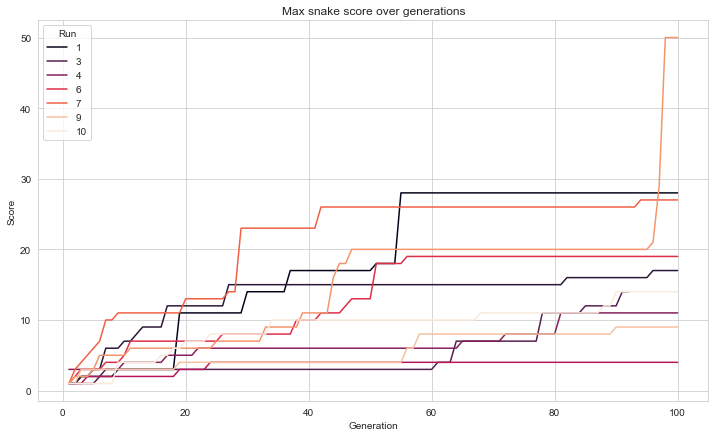

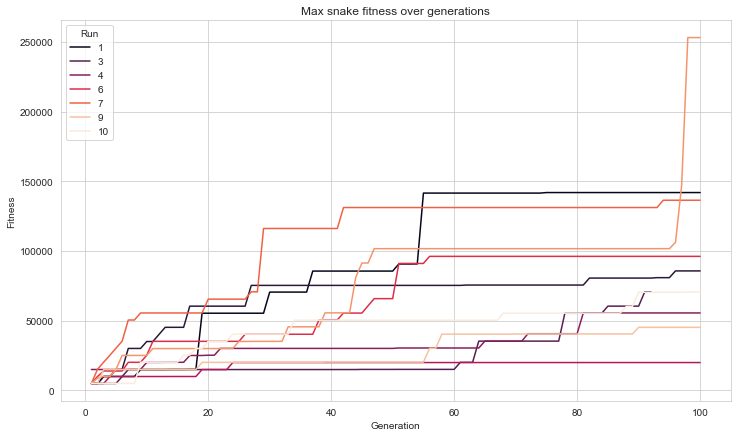

In [63]:
f_blend_swap_fitnesses, max_1 = run_analyzer("f_blend_swap") 

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
4918          82   136608     27    7
4978          83   136608     27    7
5278          88   136608     27    7
4798          80   136608     27    7
4858          81   136608     27    7
5338          89   136608     27    7
5218          87   136608     27    7
5158          86   136608     27    7
5038          84   136608     27    7
5098          85   136608     27    7
4138          69   135964     27    2
4318          72   135964     27    2
4678          78   135964     27    2
5938          99   135964     27    2
5998         100   135964     27    2

---------------------------------------------------------------



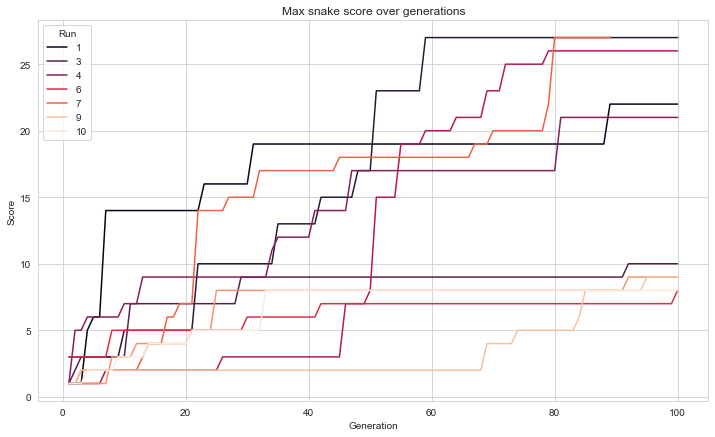

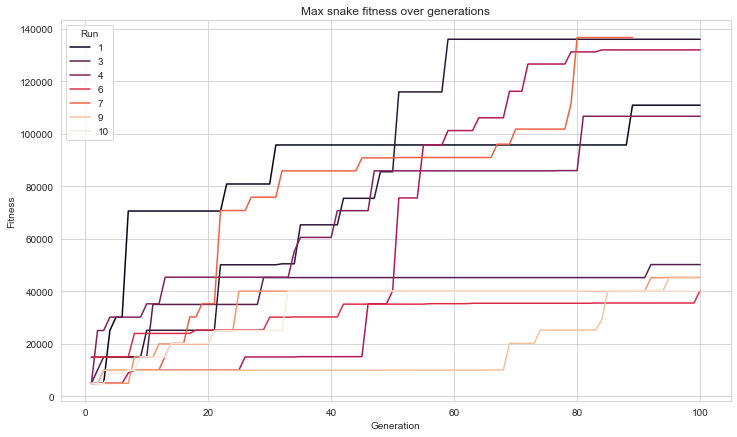

In [64]:
r_blend_inversion_fitnesses,max_2 = run_analyzer("r_blend_inversion") 

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
4498          75   278736     55   10
4438          74   278736     55   10
4078          68   223078     44   10
4437          74   223078     44   10
4378          73   223078     44   10
4198          70   223078     44   10
4138          69   223078     44   10
4318          72   223078     44   10
4258          71   223078     44   10
3958          66   217552     43   10
3538          59   217552     43   10
4018          67   217552     43   10
3898          65   217552     43   10
3718          62   217552     43   10
3658          61   217552     43   10

---------------------------------------------------------------



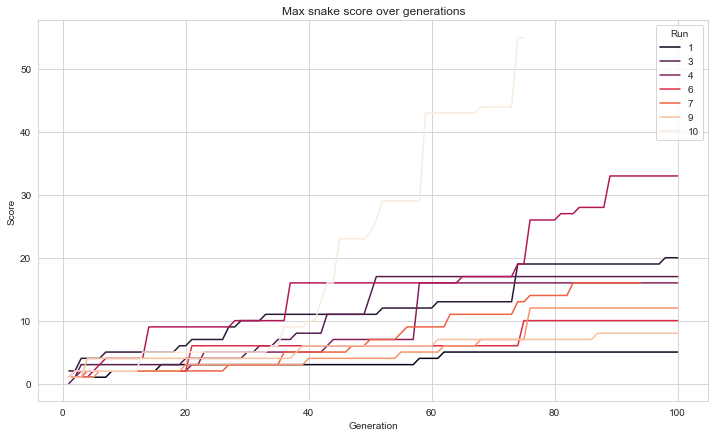

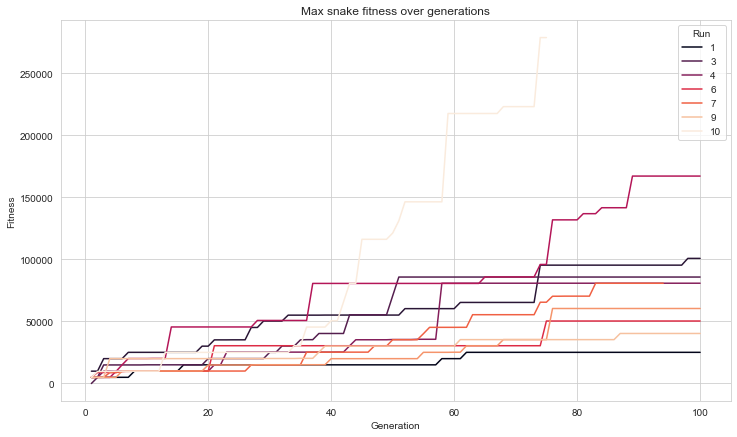

In [65]:
r_weightswap_inversion_fitness,max_3 = run_analyzer("r_weightswap_inversion") 

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
4963          83   218952     43    8
5278          88   218952     43    8
5098          85   218952     43    8
5458          91   218952     43    8
5338          89   218952     43    8
5698          95   218952     43    8
5938          99   218952     43    8
5638          94   218952     43    8
5878          98   218952     43    8
5398          90   218952     43    8
5518          92   218952     43    8
5038          84   218952     43    8
5818          97   218952     43    8
5998         100   218952     43    8
5758          96   218952     43    8

---------------------------------------------------------------



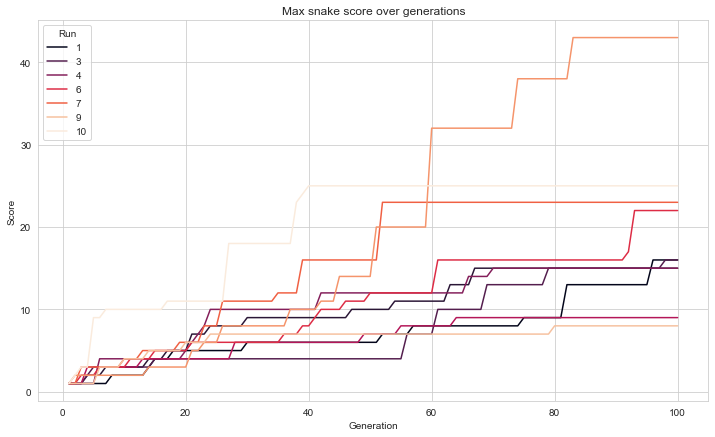

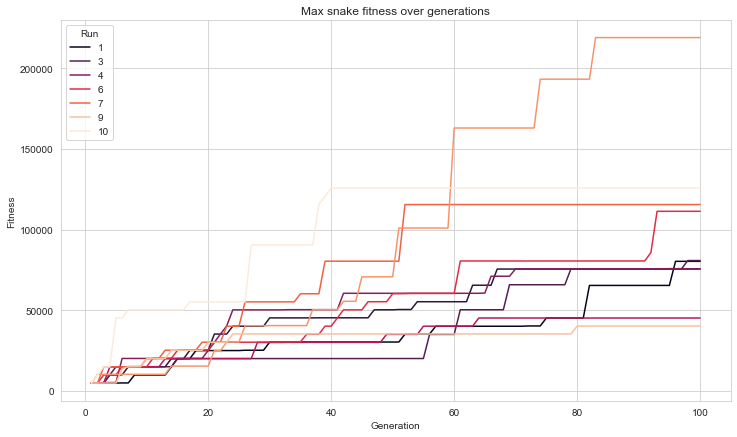

In [66]:
tournament_swap_swap_fitness,max_4 = run_analyzer("tournament_swap_swap") 

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
5638          94   297050     58   18
5518          92   297050     58   18
4558          76   297050     58   18
5878          98   297050     58   18
5698          95   297050     58   18
4378          73   297050     58   18
5218          87   297050     58   18
4438          74   297050     58   18
5278          88   297050     58   18
4678          78   297050     58   18
5038          84   297050     58   18
5818          97   297050     58   18
5338          89   297050     58   18
5998         100   297050     58   18
5098          85   297050     58   18

---------------------------------------------------------------



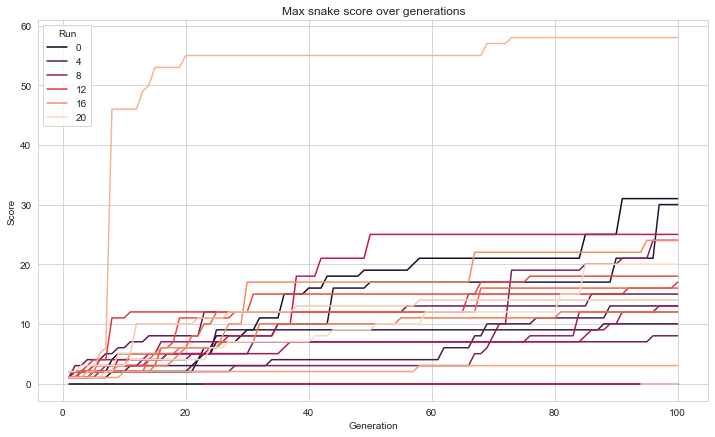

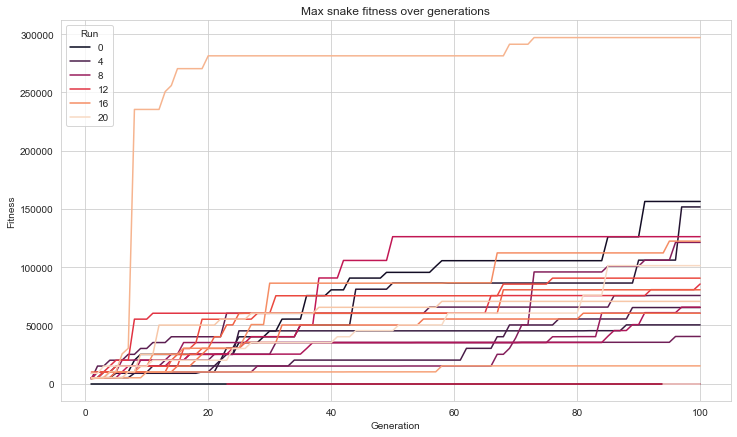

In [67]:
probabilistic_elitismTrue_fitness,max_5 = run_analyzer("probabilistic_elitismTrue") 

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
5638          94   362984     71    6
5637          94   347012     68    6
5878          98   335814     66    6
5877          98   330096     65    6
5038          84   326664     64    6
4378          73   326404     64    6
5758          96   326122     64    6
5458          91   320818     63    6
5876          98   316254     62    6
5938          99   316092     62    6
5218          87   311430     61    6
5636          94   311350     61    6
5937          99   311012     61    6
5757          96   306154     60    6
4558          76   300420     59    6

---------------------------------------------------------------



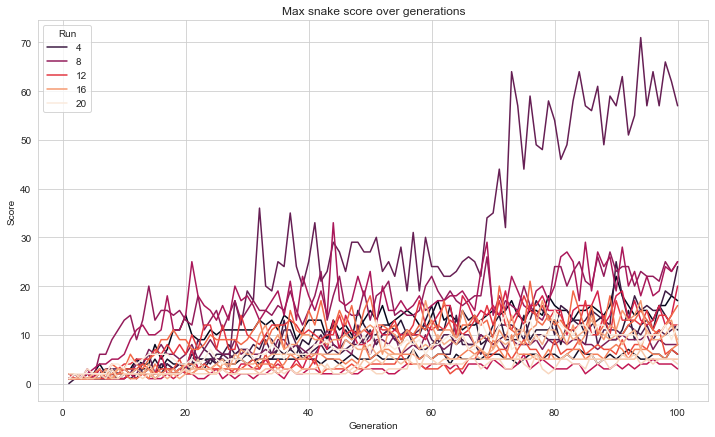

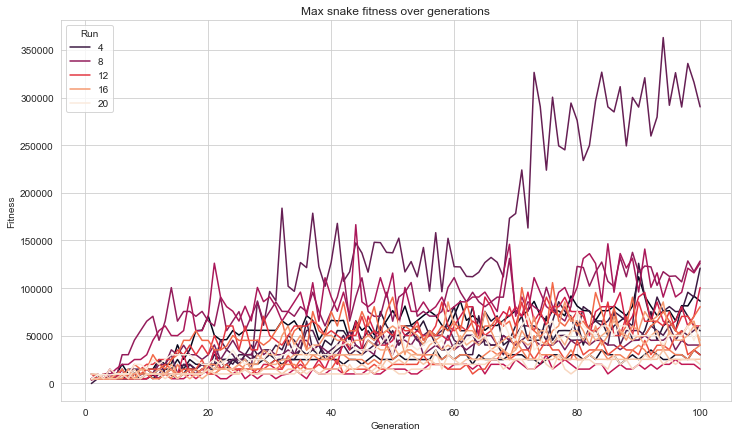

In [68]:
probabilistic_elitismFalse_fitness,max_6 = run_analyzer("probabilistic_elitsmFalse") 

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
4511          76   281080     55    7
5458          91   281080     55    7
5818          97   281080     55    7
5758          96   281080     55    7
5698          95   281080     55    7
5878          98   281080     55    7
5638          94   281080     55    7
4618          77   281080     55    7
4678          78   281080     55    7
5578          93   281080     55    7
4798          80   281080     55    7
5518          92   281080     55    7
4858          81   281080     55    7
4918          82   281080     55    7
5938          99   281080     55    7

---------------------------------------------------------------



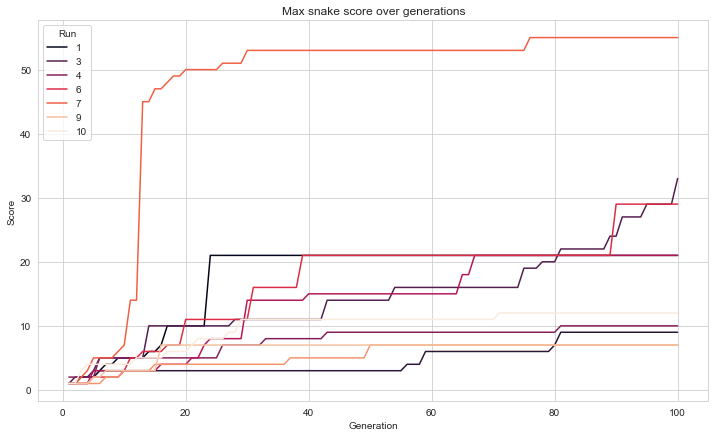

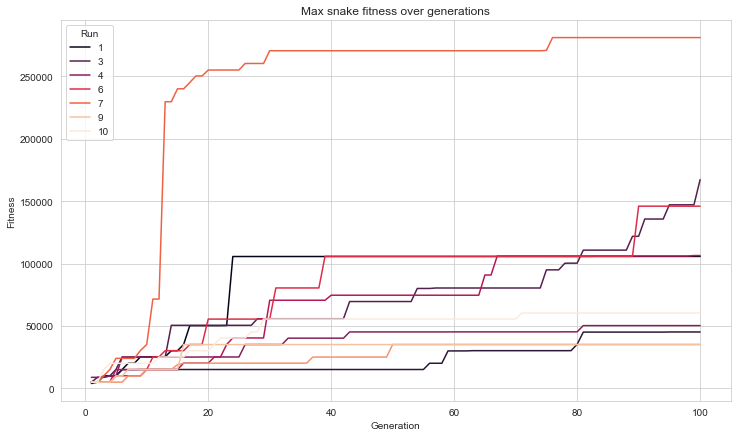

In [69]:
f_arithmetic_swap_fitness,max_7 = run_analyzer("f_arithmetic_swap") 

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
5998         100   218082     43    3
5903          99   218082     43    3
5818          97   156928     31    3
5878          98   156928     31    3
5938          99   156928     31    3
5712          96   156928     31    3
5218          87   151564     30    3
4258          71   151564     30    3
4738          79   151564     30    3
4108          69   151564     30    3
4918          82   151564     30    3
4618          77   151564     30    3
5098          85   151564     30    3
5038          84   151564     30    3
5518          92   151564     30    3

---------------------------------------------------------------



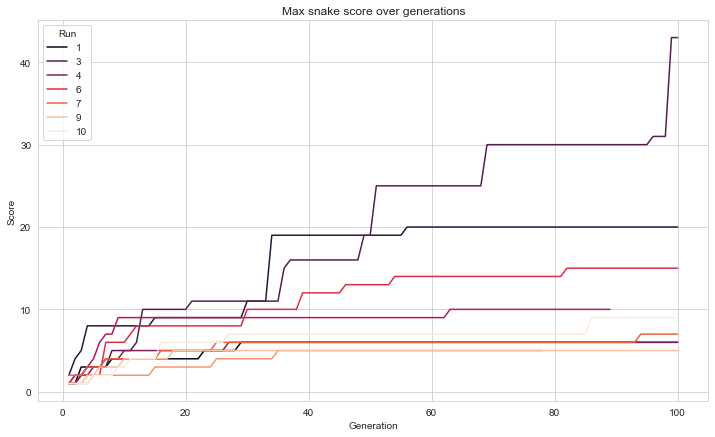

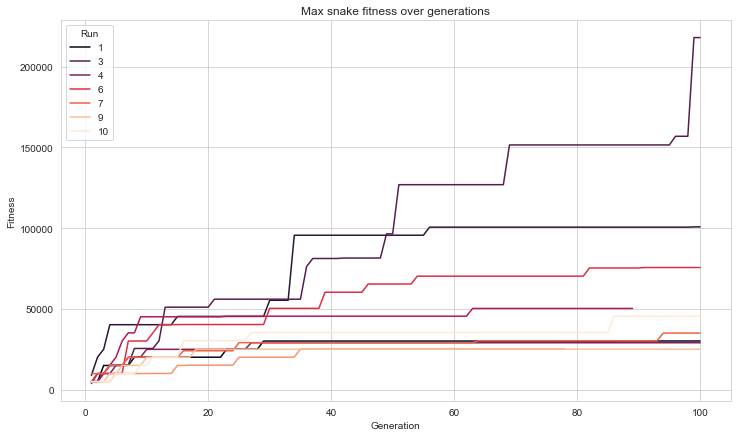

In [70]:
tournament_arithmeticco_box_fitness,max_8 = run_analyzer("tournament_arithmeticco_box")

Maximum values achieved in the configuration:

       Generation  Fitness  Score  Run
4371          73   156866     31    1
4618          77   156866     31    1
4858          81   156866     31    1
5938          99   156866     31    1
5458          91   156866     31    1
5098          85   156866     31    1
5758          96   156866     31    1
4798          80   156866     31    1
5698          95   156866     31    1
5998         100   156866     31    1
5578          93   156866     31    1
5158          86   156866     31    1
5398          90   156866     31    1
4498          75   156866     31    1
4558          76   156866     31    1

---------------------------------------------------------------



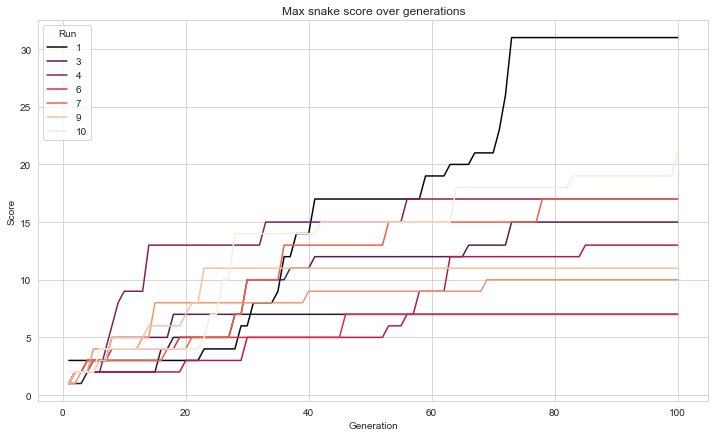

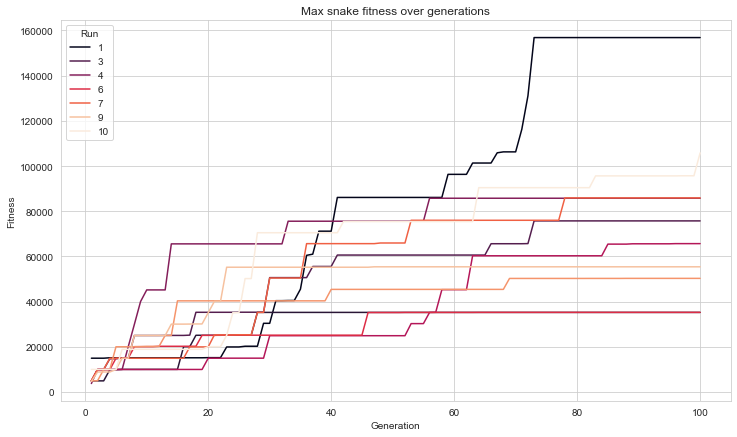

In [71]:
fps_arithmetic_inversion_fitness, max_9 = run_analyzer("fps_arithmetic_inversion")

In [72]:
df_configs = pd.DataFrame() 
df_configs["fps - blend co - swap mutation"] = f_blend_swap_fitnesses 
df_configs["rank select - blend co - inversion mutation"] = r_blend_inversion_fitnesses 
df_configs["rank select - weights swap co - inversion mutation"] = r_weightswap_inversion_fitness 
df_configs["probabilistic - without elitism"] = probabilistic_elitismFalse_fitness 
df_configs["probabilistic"] = probabilistic_elitismTrue_fitness 
df_configs["tournament - weights swap co - swap mutation"] = probabilistic_elitismTrue_fitness 
df_configs["fps - arithmetic co - swap mutation"] = f_arithmetic_swap_fitness 
df_configs["tournament - arithmetic co - box mutation"] = tournament_arithmeticco_box_fitness
df_configs["fps - arithmetic co - inversion mutation"] = fps_arithmetic_inversion_fitness

In [73]:
df_max_scores = 0

In [74]:
df_max_scores = pd.DataFrame(index=df_configs.columns, columns=["Scores"])

scores = [max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,max_9]

df_max_scores["Scores"] = scores

Text(0.5, 1.0, 'Average max-of-run snake fitness across generations')

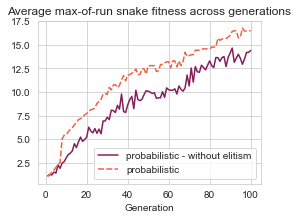

In [80]:
df_elite = df_configs[["probabilistic - without elitism","probabilistic"]]

fig, ax = plt.subplots(figsize=(4,3)) 
 
sns.lineplot(data=df_elite, palette="rocket").set_title(f"Average max-of-run snake fitness across generations")



Text(0.5, 1.0, 'Average max-of-run snake score across generations')

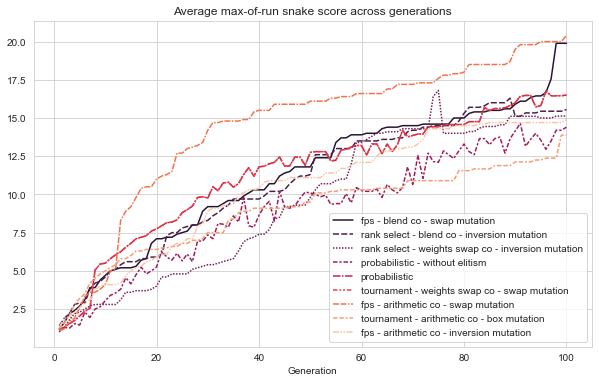

In [91]:
fig, ax = plt.subplots(figsize=(10,6)) 
 
sns.lineplot(data=df_configs, palette="rocket").set_title(f"Average max-of-run snake score across generations")

In [77]:
best_model = pd.read_csv("/Users/cetiners/Desktop/NOVA IMS/CIFO Project/Projects/BOTS_snake/runs/best_model/bestmodel1000runs.csv") 
best_model.columns = ["Max snake score in run"] 

Text(0.5, 0.98, 'Score distribution for the top performing snake')

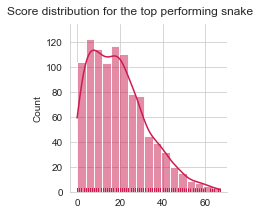

In [86]:
sns.set_style("whitegrid") 
figure = sns.displot(best_model, palette="rocket", legend=False,rug=True,kde=True,height=3) 
figure.fig.subplots_adjust(top=0.9) # adjust the Figure in rp 
figure.fig.suptitle('Score distribution for the top performing snake', fontsize=12) 

In [61]:
best_model.describe()

,Max snake score in run
count,1000.000000
mean,19.312000
std,13.557672
min,0.000000
25%,8.000000
50%,18.000000
75%,28.000000
max,67.000000
